In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from six.moves import xrange
from utils import create_window_on_multiple_samples, split_train_test

In [2]:
from IPython.display import SVG, display
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
import svgwrite
import random
import os
from six.moves import xrange

In [4]:
# helper function for draw_strokes
def get_bounds(data, factor):
  min_x = 0
  max_x = 0
  min_y = 0
  max_y = 0
    
  abs_x = 0
  abs_y = 0
  for i in xrange(len(data)):
    x = float(data[i,0])/factor
    y = float(data[i,1])/factor
    abs_x += x
    abs_y += y
    min_x = min(min_x, abs_x)
    min_y = min(min_y, abs_y)
    max_x = max(max_x, abs_x)
    max_y = max(max_y, abs_y)
    
  return (min_x, max_x, min_y, max_y)

# little function that displays vector images and saves them to .svg
def draw_strokes(data, factor=2, svg_filename = 'sample.svg'):
  min_x, max_x, min_y, max_y = get_bounds(data, factor)
  dims = (50 + max_x - min_x, 50 + max_y - min_y)
  dwg = svgwrite.Drawing(svg_filename, size=dims)
  dwg.add(dwg.rect(insert=(0, 0), size=dims,fill='white'))
  lift_pen = 1
  abs_x = 25 - min_x 
  abs_y = 25 - min_y
  p = "M%s,%s " % (abs_x, abs_y)
  command = "m"
  for i in xrange(0,20):
    if (lift_pen == 1):
      command = "m"
    elif (command != "l"):
      command = "l"
    else:
      command = ""
    x = float(data[i,0])/factor
    y = float(data[i,1])/factor
    lift_pen = data[i, 2]
    p += command+str(x)+","+str(y)+" "
  the_color = "red"
  stroke_width = 2
  dwg.add(dwg.path(p).stroke(the_color,stroke_width).fill("none"))
  for i in xrange(20,len(data)):
    if (lift_pen == 1):
      command = "m"
    elif (command != "l"):
      command = "l"
    else:
      command = ""
    x = float(data[i,0])/factor
    y = float(data[i,1])/factor
    lift_pen = data[i, 2]
    p += command+str(x)+","+str(y)+" "
  the_color = "black"
  stroke_width = 1
  dwg.add(dwg.path(p).stroke(the_color,stroke_width).fill("none"))
  dwg.save()
  display(SVG(dwg.tostring()))

# generate a 2D grid of many vector drawings
def make_grid_svg(s_list, grid_space=10.0, grid_space_x=15.0):
  def get_start_and_end(x):
    x = np.array(x)
    x = x[:, 0:2]
    x_start = x[0]
    x_end = x.sum(axis=0)
    x = x.cumsum(axis=0)
    x_max = x.max(axis=0)
    x_min = x.min(axis=0)
    center_loc = (x_max+x_min)*0.5
    return x_start-center_loc, x_end
  x_pos = 0.0
  y_pos = 0.0
  result = [[x_pos, y_pos, 1]]
  for sample in s_list:
    s = sample[0]
    grid_loc = sample[1]
    grid_y = grid_loc[0]*grid_space+grid_space*0.5
    grid_x = grid_loc[1]*grid_space_x+grid_space_x*0.5
    start_loc, delta_pos = get_start_and_end(s)

    loc_x = start_loc[0]
    loc_y = start_loc[1]
    new_x_pos = grid_x+loc_x
    new_y_pos = grid_y+loc_y
    result.append([new_x_pos-x_pos, new_y_pos-y_pos, 0])

    result += s.tolist()
    result[-1][2] = 1
    x_pos = new_x_pos+delta_pos[0]
    y_pos = new_y_pos+delta_pos[1]
  return np.array(result)
#test_set = np.load(data_dir, encoding='latin1', allow_pickle=True)
# get a sample drawing from the test set, and render it to .svg

In [5]:
cloud = np.load("cloud.npz", allow_pickle=True, encoding="latin1")

In [6]:
train = cloud["train"]

In [7]:
windows = create_window_on_multiple_samples(train, 21)

Done processing 69999 samples, total of 2762224 windows and 58006704 datapoints


In [8]:
train[0]

array([[   1,  -42,    0],
       [   5,  -10,    0],
       [  28,  -21,    0],
       [  29,   -8,    0],
       [  47,    1,    0],
       [  19,   10,    0],
       [   2,   12,    0],
       [ -11,   15,    0],
       [  10,    2,    0],
       [  92,   -5,    0],
       [ 137,    0,    0],
       [   3,    5,    0],
       [  -7,    3,    0],
       [ -16,   17,    0],
       [ 130,   -1,    0],
       [   6,    5,    0],
       [  -1,   13,    0],
       [  -4,    9,    0],
       [ -22,   22,    0],
       [  50,   -4,    0],
       [  68,    2,    0],
       [  19,   12,    0],
       [   9,   18,    0],
       [  -2,   24,    0],
       [ -15,   19,    0],
       [ -32,   17,    0],
       [ -29,   20,    0],
       [ -20,   10,    0],
       [ -16,    4,    0],
       [  22,    0,    0],
       [   3,    5,    0],
       [  -2,    6,    0],
       [ -17,   15,    0],
       [-134,   68,    0],
       [ -24,    6,    0],
       [ -31,    0,    0],
       [  -9,   -3,    0],
 

In [9]:
X, y = split_train_test(windows)

In [10]:
y[0]

array([68.,  2.,  0.])

In [11]:
Xreshaped = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

In [12]:
Xreshaped[0]

array([  1., -42.,   0.,   5., -10.,   0.,  28., -21.,   0.,  29.,  -8.,
         0.,  47.,   1.,   0.,  19.,  10.,   0.,   2.,  12.,   0., -11.,
        15.,   0.,  10.,   2.,   0.,  92.,  -5.,   0., 137.,   0.,   0.,
         3.,   5.,   0.,  -7.,   3.,   0., -16.,  17.,   0., 130.,  -1.,
         0.,   6.,   5.,   0.,  -1.,  13.,   0.,  -4.,   9.,   0., -22.,
        22.,   0.,  50.,  -4.,   0.])

In [13]:
model = LinearRegression()
model.fit(Xreshaped, y)

LinearRegression()

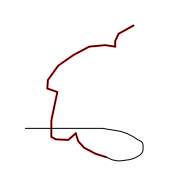

In [35]:
Xcopy = np.copy(random.choice(X))

for i in range(100):
    yhat = np.round(model.predict(Xcopy[-20:].reshape(1,-1)))
    Xcopy = np.vstack((Xcopy, yhat))

draw_strokes(Xcopy)